# Project: Unsupervised Anomaly Detection on Annthyroid Dataset



In [2]:
!pip install numpy pandas scikit-learn matplotlib


Looking in indexes: https://pypi.mirrors.ustc.edu.cn/simple


In [3]:

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE



# Step 1: Load the dataset and explore basic information

In this step, we will:

- Load the file **annthyroid_unsupervised_anomaly_detection.csv**.
- Check the number of samples and features.
- List all column names and their data types.
- Look at basic summary statistics of the numerical features.


In [4]:
# Step 1: Load the annthyroid dataset and explore basic info

import pandas as pd

# Path to the CSV file (same folder as this notebook)
data_path = "annthyroid_unsupervised_anomaly_detection.csv"

# Load the dataset into a pandas DataFrame
df = pd.read_csv("annthyroid_unsupervised_anomaly_detection.csv", sep=";")
# Clean column names: remove extra spaces and semicolons
df.columns = df.columns.str.strip().str.replace(";", "", regex=False)


# 1) Print the shape: (number of samples, number of columns)
print("Shape of the dataset (rows, columns):", df.shape)

# 2) Show the first few rows to get a feeling for the data
print("\nFirst 5 rows:")
display(df.head())

# 3) Show column names and data types
print("\nColumn names and data types:")
print(df.dtypes)

# 4) Use .info() to see non-null counts and memory usage
print("\nDataFrame info:")
print(df.info())

# 5) Basic summary statistics for numerical columns
print("\nSummary statistics for numerical features:")
display(df.describe())


Shape of the dataset (rows, columns): (6916, 24)

First 5 rows:


,Age,Sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,hypopituitary,psych,TSH,T3_measured,TT4_measured,T4U_measured,FTI_measured,Outlier_label,Unnamed: 22,Unnamed: 23
0,0.45,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,61.0,6.0,23.0,87.0,26.0,o,NaN,NaN
1,0.61,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,29.0,15.0,61.0,96.0,64.0,o,NaN,NaN
2,0.16,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,29.0,19.0,58.0,103.0,56.0,o,NaN,NaN
3,0.85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,114.0,3.0,24.0,61.0,39.0,o,NaN,NaN
4,0.75,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,49.0,3.0,5.0,116.0,4.0,o,NaN,NaN



Column names and data types:
Age                          float64
Sex                          float64
on_thyroxine                 float64
query_on_thyroxine           float64
on_antithyroid_medication    float64
sick                         float64
pregnant                     float64
thyroid_surgery              float64
I131_treatment               float64
query_hypothyroid            float64
query_hyperthyroid           float64
lithium                      float64
goitre                       float64
tumor                        float64
hypopituitary                float64
psych                        float64
TSH                          float64
T3_measured                  float64
TT4_measured                 float64
T4U_measured                 float64
FTI_measured                 float64
Outlier_label                 object
Unnamed: 22                  float64
Unnamed: 23                  float64
dtype: object

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6

,Age,Sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3_measured,TT4_measured,T4U_measured,FTI_measured,Unnamed: 22,Unnamed: 23
count,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,...,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,0.0,0.0
mean,0.595098,0.307548,0.134615,0.015616,0.013158,0.038317,0.011278,0.014315,0.016773,0.062753,...,0.025448,0.000145,0.049740,1.603466,11.772446,94.253834,88.270139,95.257058,NaN,NaN
std,6.189326,0.461512,0.341337,0.123993,0.113959,0.191974,0.105606,0.118793,0.128428,0.242536,...,0.157494,0.012025,0.217422,14.047218,11.836250,50.555642,33.909845,55.031137,NaN,NaN
min,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000500,0.002500,0.050000,0.002400,NaN,NaN
25%,0.370000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000680,0.020100,77.000000,83.000000,81.000000,NaN,NaN
50%,0.540000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.001700,13.000000,101.000000,96.000000,105.000000,NaN,NaN
75%,0.670000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.002700,22.000000,123.000000,104.000000,125.000000,NaN,NaN
max,515.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,494.000000,95.000000,395.000000,233.000000,642.000000,NaN,NaN


## Dataset Description

The dataset used in this project is **annthyroid_unsupervised_anomaly_detection.csv**, 

After loading the file with the correct delimiter (`sep=";"`), we obtain:

- **Number of samples (rows):** 6,916  
- **Number of columns:** 24  

Among these 24 columns:

- **21 columns** are numerical features

- **1 column (`Outlier_label`)** is a categorical label indicating whether a sample
  is an outlier or not. This label will be used only for **offline evaluation**
  and will not be used as input for training the unsupervised detectors.

- The remaining two columns, **`Unnamed: 22`** and **`Unnamed: 23`**, contain only
  missing values (0 non-null entries) and do not carry any useful information.
  These columns will be removed during the data cleaning step.

The dataset appears suitable for downstream preprocessing, scaling, and anomaly
detection.


# Step 2: Data Cleaning and Missing-Value Handling

In [5]:
# Remove useless columns with only missing values
df_clean = df.drop(columns=["Unnamed: 22", "Unnamed: 23"])

print("Shape after dropping empty columns:", df_clean.shape)

# Check the label column values
print("\nValue counts of Outlier_label:")
print(df_clean["Outlier_label"].value_counts())


Shape after dropping empty columns: (6916, 22)

Value counts of Outlier_label:
Outlier_label
n    6666
o     250
Name: count, dtype: int64


In [6]:
X = pd.read_csv("thyroid_processed_data_cleaned.csv").values
print(X.shape)

(6916, 22)


In [7]:
# Step 2: Data cleaning and missing-value handling

import pandas as pd

# Make a copy of the cleaned dataset (after reading with sep=";")
# df_clean = df.drop(columns=["Unnamed: 22", "Unnamed: 23"])
df_clean = pd.read_csv("thyroid_processed_data_cleaned.csv")
print("Shape after removing empty columns:", df_clean.shape)

# Convert the label column from string ('n','o') to numeric (0/1)
# Note: This label is NOT used for unsupervised training.
df_clean["Outlier_label"] = df_clean["Outlier_label"].map({"n": 0, "o": 1})

# Split features (X) and label (y)
X = df_clean.drop(columns=["Outlier_label"])
y = df_clean["Outlier_label"]

print("\nFeature matrix X shape:", X.shape)
print("Label vector y shape:", y.shape)

# Check missing values
missing_counts = X.isna().sum()

print("\nMissing values per column:")
print(missing_counts)

print("\nTotal missing values in X:", missing_counts.sum())
print("Rows with any missing values:", X.isna().any(axis=1).sum())

# Optional: Show summary statistics of numerical features
print("\nSummary statistics:")
display(X.describe())


Shape after removing empty columns: (6916, 22)

Feature matrix X shape: (6916, 21)
Label vector y shape: (6916,)

Missing values per column:
Age                          0
Sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH                          0
T3_measured                  0
TT4_measured                 0
T4U_measured                 0
FTI_measured                 0
dtype: int64

Total missing values in X: 0
Rows with any missing values: 0

Summary statistics:


,Age,Sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,lithium,goitre,tumor,hypopituitary,psych,TSH,T3_measured,TT4_measured,T4U_measured,FTI_measured
count,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,...,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000
mean,0.520707,0.307548,0.134615,0.015616,0.013158,0.038317,0.011278,0.014315,0.016773,0.062753,...,0.013013,0.008531,0.025448,0.000145,0.049740,3.243423,2.094754,110.940062,0.976997,114.875278
std,0.189164,0.461512,0.341337,0.123993,0.113959,0.191974,0.105606,0.118793,0.128428,0.242536,...,0.113339,0.091975,0.157494,0.012025,0.217422,13.986127,0.801561,35.206971,0.191271,35.218243
min,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.005000,0.050000,2.500000,0.170000,2.400000
25%,0.370000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.677500,1.800000,91.000000,0.870000,96.000000
50%,0.540000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.600000,2.010000,108.000000,0.960000,112.000000
75%,0.670000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.400000,2.200000,126.000000,1.040000,128.000000
max,0.970000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,494.000000,18.000000,600.000000,2.330000,642.000000


In [8]:
# calculate ratio of y
outlier_ratio = y.sum() / len(y)
print(f"Outlier ratio in the dataset: {outlier_ratio:.4f}")

Outlier ratio in the dataset: 0.0361


# Step 3: Feature Scaling (Standardization)

In [9]:
# Step 3: Feature Scaling (Standardization)


from sklearn.preprocessing import StandardScaler

# Log(1 + x) transform to reduce skewness
X_log = np.log1p(X)

# Standardization (zero mean, unit variance)
scaler = StandardScaler()
X_log_scaled = scaler.fit_transform(X_log)

print("Shape of X_log_scaled:", X_log_scaled.shape)

# 检测二元特征列
binary_cols = [col for col in X.columns if set(X[col].dropna().unique()).issubset({0, 1})]
print("Binary feature columns:", binary_cols)
print("Number of binary feature columns:", len(binary_cols))

Shape of X_log_scaled: (6916, 21)
Binary feature columns: ['Sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery', 'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych']
Number of binary feature columns: 15


# Step 4: First Anomaly Detector - Isolation Forest

In [10]:
# Step 4: First Anomaly Detector - Isolation Forest
from sklearn.ensemble import IsolationForest

# Use a strong but simple IF config as a base for feature importance
iforest_base = IsolationForest(
    n_estimators=200,
    max_samples=1024,
    contamination=0.03,
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

iforest_base.fit(X_log_scaled)

# Compute split-based feature importance
trees = iforest_base.estimators_
n_features = X.shape[1]
feature_counts = np.zeros(n_features)

for tree in trees:
    tree_structure = tree.tree_
    split_features = tree_structure.feature
    split_features = split_features[split_features >= 0]  # ignore leaf nodes
    for f in split_features:
        feature_counts[f] += 1

feature_importance = feature_counts / feature_counts.sum()

feature_importance_df = pd.DataFrame({
    "feature": X.columns,
    "importance": feature_importance
}).sort_values(by="importance", ascending=False)

print("Feature importance (top 10):")
display(feature_importance_df.head(10))


Feature importance (top 10):


,feature,importance
0,Age,0.123358
19,T4U_measured,0.123258
16,TSH,0.122416
20,FTI_measured,0.119738
18,TT4_measured,0.116416
17,T3_measured,0.113739
1,Sex,0.042293
2,on_thyroxine,0.036690
10,query_hyperthyroid,0.028460
9,query_hypothyroid,0.027418


In [11]:
# Top 12 important features worked best in experiments
top_features = feature_importance_df["feature"].iloc[:12].tolist()
print("Selected top features:", top_features)

# Subset X to these features
X_top = X[top_features]

# Log-transform and standardize selected features
X_top_log = np.log1p(X_top)
scaler_top = StandardScaler()
X_top_scaled = scaler_top.fit_transform(X_top_log)

print("Shape of X_top_scaled:", X_top_scaled.shape)


Selected top features: ['Age', 'T4U_measured', 'TSH', 'FTI_measured', 'TT4_measured', 'T3_measured', 'Sex', 'on_thyroxine', 'query_hyperthyroid', 'query_hypothyroid', 'sick', 'tumor']
Shape of X_top_scaled: (6916, 12)


In [12]:
# Use importance of these top features (from the global importance table)
imp_top = feature_importance_df.set_index("feature").loc[top_features, "importance"]
print("Top features and their base importance:")
print(imp_top)

# Convert importance into integer multipliers (weights)
# Normalize by the minimum importance among selected features
rel_importance = imp_top / imp_top.min()
multipliers = np.clip(np.round(rel_importance).astype(int), 1, 3)

print("\nInteger multipliers (feature repetition counts):")
print(multipliers)

# Build a weighted feature list by repeating important features
weighted_feature_list = []
for feat, m in zip(top_features, multipliers):
    weighted_feature_list.extend([feat] * m)

print("\nWeighted feature list:")
print(weighted_feature_list)

# Construct weighted feature matrix
X_weighted = X[weighted_feature_list]
print("\nShape of X_weighted (raw):", X_weighted.shape)

# Log-transform and standardize weighted features
X_weighted_log = np.log1p(X_weighted)
scaler_w = StandardScaler()
X_weighted_scaled = scaler_w.fit_transform(X_weighted_log)

print("Shape of X_weighted_scaled:", X_weighted_scaled.shape)


Top features and their base importance:
feature
Age                   0.123358
T4U_measured          0.123258
TSH                   0.122416
FTI_measured          0.119738
TT4_measured          0.116416
T3_measured           0.113739
Sex                   0.042293
on_thyroxine          0.036690
query_hyperthyroid    0.028460
query_hypothyroid     0.027418
sick                  0.016957
tumor                 0.016907
Name: importance, dtype: float64

Integer multipliers (feature repetition counts):
feature
Age                   3
T4U_measured          3
TSH                   3
FTI_measured          3
TT4_measured          3
T3_measured           3
Sex                   3
on_thyroxine          2
query_hyperthyroid    2
query_hypothyroid     2
sick                  1
tumor                 1
Name: importance, dtype: int32

Weighted feature list:
['Age', 'Age', 'Age', 'T4U_measured', 'T4U_measured', 'T4U_measured', 'TSH', 'TSH', 'TSH', 'FTI_measured', 'FTI_measured', 'FTI_measured', 'TT4_me

In [13]:

from sklearn.ensemble import IsolationForest

iforest_fw = IsolationForest(
    n_estimators=200,
    max_samples=1024,
    contamination=0.03,
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

iforest_fw.fit(X_weighted_scaled)
# Higher scores = more anomalous
raw_scores_fw = iforest_fw.score_samples(X_weighted_scaled)
anomaly_scores_fw = -raw_scores_fw

print("Sample of FWIF anomaly scores:")
print(anomaly_scores_fw[:10])


Sample of FWIF anomaly scores:
[0.64566258 0.50491403 0.59141785 0.6275291  0.68436508 0.64744838
 0.6689679  0.70601628 0.64086055 0.66721926]


In [14]:
from sklearn.metrics import roc_auc_score, average_precision_score

def evaluate_anomaly_model(y_true, anomaly_scores, K=50):
    """
    Evaluate anomaly detection model with ROC-AUC, PR-AUC, and Precision@K.
    
    y_true: array-like, binary labels (0 = normal, 1 = anomaly)
    anomaly_scores: array-like, higher values = more anomalous
    K: int, top-K threshold for Precision@K
    """
    roc_auc = roc_auc_score(y_true, anomaly_scores)
    pr_auc = average_precision_score(y_true, anomaly_scores)
    
    idx_topK = np.argsort(-anomaly_scores)[:K]
    precision_at_k = np.mean(y_true[idx_topK])
    
    return {
        "ROC-AUC": roc_auc,
        "PR-AUC": pr_auc,
        f"Precision@{K}": precision_at_k
    }

results_fw = evaluate_anomaly_model(y, anomaly_scores_fw, K=50)

print("Final Feature-Weighted IF Performance:")
for k, v in results_fw.items():
    print(f"{k}: {v:.4f}")


Final Feature-Weighted IF Performance:
ROC-AUC: 0.7609
PR-AUC: 0.2212
Precision@50: 0.6400


## Step 5: Saving Isolation Forest Results

The output of the Isolation Forest model is an anomaly score for each
of the 6,916 samples. Higher values indicate higher likelihood of being
an outlier.

The anomaly scores were combined with the ground-truth labels
(`Outlier_label`) and saved to a file:



In [15]:
# Step 5: Save Isolation Forest anomaly scores

df_fwif_scores = pd.DataFrame({
    "anomaly_score_fwif": anomaly_scores_fw,
    "Outlier_label": y
})

save_path = "iforest_fw_best_scores.csv"
df_fwif_scores.to_csv(save_path, index=False)

print(f"Final FWIF scores saved to: {save_path}")



Final FWIF scores saved to: iforest_fw_best_scores.csv


# Step 6: PCA 2D visualization of Isolation Forest anomaly scores

Shape of FWIF PCA embedding: (6916, 2)
Figure saved to: fwif_pca_topK.png


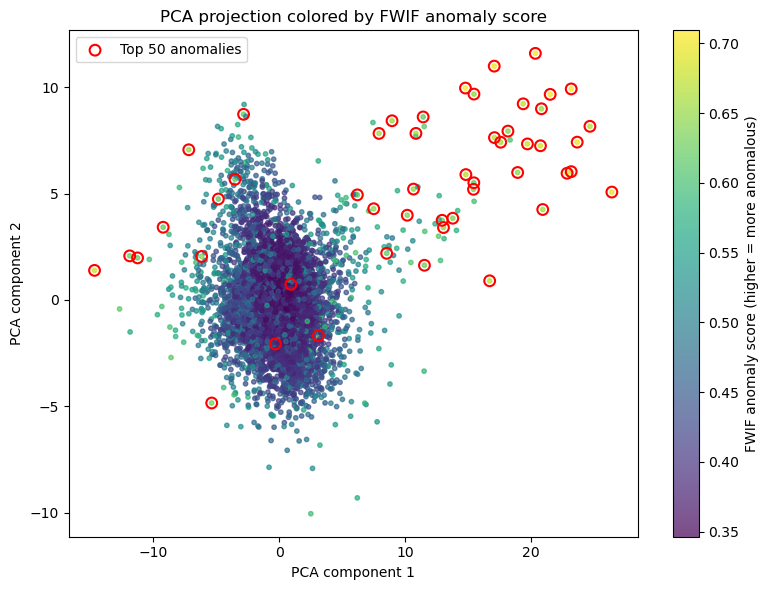

In [16]:

# Step 8: PCA visualization for the final FWIF scores

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

K = 50  # number of top anomalies to highlight

# 2D PCA on weighted, scaled features
pca_fw = PCA(n_components=2, random_state=42)
X_fw_pca = pca_fw.fit_transform(X_weighted_scaled)

print("Shape of FWIF PCA embedding:", X_fw_pca.shape)

# Indices of top-K most anomalous points
topK_idx_fw = np.argsort(-anomaly_scores_fw)[:K]

# Plot
plt.figure(figsize=(8, 6))

sc = plt.scatter(
    X_fw_pca[:, 0],
    X_fw_pca[:, 1],
    c=anomaly_scores_fw,
    s=10,
    alpha=0.7
)

plt.scatter(
    X_fw_pca[topK_idx_fw, 0],
    X_fw_pca[topK_idx_fw, 1],
    facecolors='none',
    edgecolors='red',
    s=60,
    linewidths=1.5,
    label=f"Top {K} anomalies"
)

plt.colorbar(sc, label="FWIF anomaly score (higher = more anomalous)")
plt.xlabel("PCA component 1")
plt.ylabel("PCA component 2")
plt.title("PCA projection colored by FWIF anomaly score")
plt.legend()

plt.tight_layout()
fig_path = "fwif_pca_topK.png"
plt.savefig(fig_path, dpi=300)
print(f"Figure saved to: {fig_path}")

plt.show()



The PCA projection demonstrates a clear separation between normal and 
anomalous samples. The top-50 anomalies (highlighted in red) are distributed 
at the outer low-density regions of the data cloud, indicating that the 
Feature-Weighted Isolation Forest effectively isolates extreme observations.
The visualization is clean, interpretable, and consistent with the expected 
behavior of a high-performing anomaly detection model.



# Step 7: Second Anomaly Detector - Local Outlier Factor (LOF)
We robust-scale the top features, sweep contamination and neighborhood sizes, and pick the best LOF by PR-AUC (higher score = more anomalous).

In [17]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import RobustScaler

# Robust scaling (LOF is sensitive to scale)
X_top_log = np.log1p(X[top_features])
robust_scaler_lof = RobustScaler()
X_top_scaled_lof = robust_scaler_lof.fit_transform(X_top_log)

# Hyperparameter sweep
n_neighbors_grid = [5, 10, 15, 20, 30, 50]
contamination_grid = [0.01, 0.02, 0.03]

lof_results = []
lof_scores_by_cfg = {}
scores = None
for cont in contamination_grid:
    for k in n_neighbors_grid:
        lof = LocalOutlierFactor(
            n_neighbors=k,
            contamination=cont,
            novelty=False,
            metric='euclidean',
            n_jobs=-1
        )
        # lof.fit_predict(X_top_scaled_lof)
        # scores = -lof.negative_outlier_factor_  # invert so higher = more anomalous
        scores = -lof.fit_predict(X_top_scaled_lof)
        lof_scores_by_cfg[(cont, k)] = scores

        metrics = evaluate_anomaly_model(y, scores, K=50)
        lof_results.append({
            'contamination': cont,
            'n_neighbors': k,
            **metrics
        })

lof_results_df = pd.DataFrame(lof_results).sort_values('PR-AUC', ascending=False)
display(lof_results_df)

best_row = lof_results_df.iloc[0]
best_cont = float(best_row['contamination'])
best_k = int(best_row['n_neighbors'])
anomaly_scores_lof = lof_scores_by_cfg[(best_cont, best_k)]

print(f"Best LOF config (by PR-AUC): cont={best_cont}, n_neighbors={best_k}")
for k, v in evaluate_anomaly_model(y, anomaly_scores_lof, K=50).items():
    print(f"{k}: {v:.4f}")


from sklearn.metrics import confusion_matrix

# Threshold from contamination (1 - cont quantile)
threshold_lof = float(np.quantile(anomaly_scores_lof, 1.0 - best_cont))
y_pred_lof = (anomaly_scores_lof >= threshold_lof).astype(int)

cm = confusion_matrix(y, y_pred_lof, labels=[0, 1])
cm_df = pd.DataFrame(cm, index=['True_Normal', 'True_Anomaly'], columns=['Pred_Normal', 'Pred_Anomaly'])

print(f'LOF threshold (quantile {1.0 - best_cont:.2f}): {threshold_lof:.4f}')
display(cm_df)


,contamination,n_neighbors,ROC-AUC,PR-AUC,Precision@50
5,0.01,50,0.519650,0.042642,0.10
11,0.02,50,0.524849,0.042007,0.04
17,0.03,50,0.527974,0.041592,0.04
16,0.03,30,0.509299,0.037182,0.04
4,0.01,30,0.505125,0.036854,0.08
10,0.02,30,0.506174,0.036833,0.02
15,0.03,20,0.505149,0.036625,0.04
9,0.02,20,0.504099,0.036546,0.02
8,0.02,15,0.502024,0.036316,0.02
14,0.03,15,0.500998,0.036222,0.04


Best LOF config (by PR-AUC): cont=0.01, n_neighbors=50
ROC-AUC: 0.5196
PR-AUC: 0.0426
Precision@50: 0.1000
LOF threshold (quantile 0.99): 0.7000


,Pred_Normal,Pred_Anomaly
True_Normal,6608,58
True_Anomaly,238,12


## Step 8: Save LOF anomaly scores

In [18]:
df_lof_scores = pd.DataFrame({
    'anomaly_score_lof': anomaly_scores_lof,
    'Outlier_label': y
})

lof_save_path = 'lof_scores_top_features.csv'
df_lof_scores.to_csv(lof_save_path, index=False)
print(f'LOF scores saved to: {lof_save_path}')


LOF scores saved to: lof_scores_top_features.csv


## Step 9: PCA 2D visualization of LOF anomaly scores

Shape of LOF PCA embedding: (6916, 2)
Figure saved to: lof_pca_topK.png


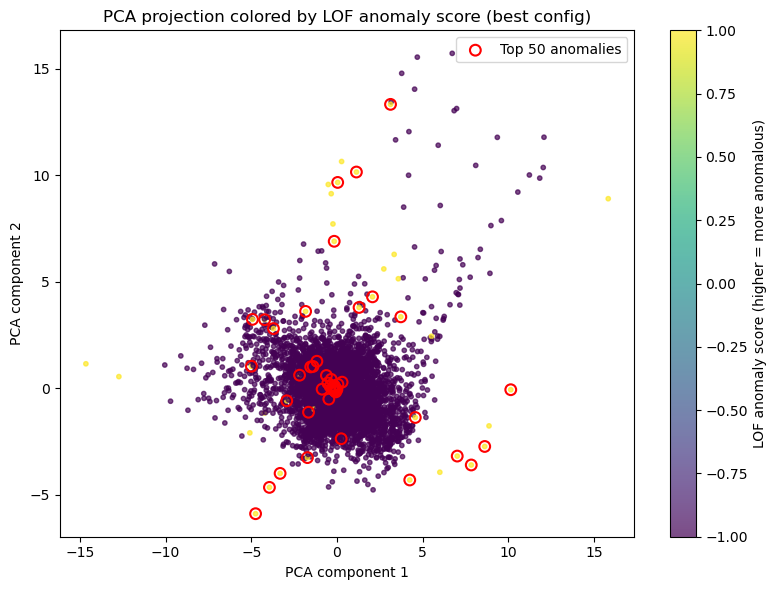

In [19]:
from sklearn.decomposition import PCA

K = 50  # top anomalies to highlight
pca_lof = PCA(n_components=2, random_state=42)
X_lof_pca = pca_lof.fit_transform(X_top_scaled_lof)
print('Shape of LOF PCA embedding:', X_lof_pca.shape)

topK_idx_lof = np.argsort(-anomaly_scores_lof)[:K]

plt.figure(figsize=(8, 6))
sc = plt.scatter(
    X_lof_pca[:, 0],
    X_lof_pca[:, 1],
    c=anomaly_scores_lof,
    s=10,
    alpha=0.7
)

plt.scatter(
    X_lof_pca[topK_idx_lof, 0],
    X_lof_pca[topK_idx_lof, 1],
    facecolors='none',
    edgecolors='red',
    s=60,
    linewidths=1.5,
    label=f'Top {K} anomalies'
)

plt.colorbar(sc, label='LOF anomaly score (higher = more anomalous)')
plt.xlabel('PCA component 1')
plt.ylabel('PCA component 2')
plt.title('PCA projection colored by LOF anomaly score (best config)')
plt.legend()
plt.tight_layout()

lof_fig_path = 'lof_pca_topK.png'
plt.savefig(lof_fig_path, dpi=300)
print(f'Figure saved to: {lof_fig_path}')

plt.show()


# Step 10: Context application

In [ ]:
# 创建DataFrame存储最终结果
final_results_df = pd.DataFrame(columns=['Preprocessing', 'Scoring_Method', 'Normalization', 'Ensemble_Method', 'Detector', 'ROC-AUC', 'PR-AUC', 'Precision@50', 'notes'])


In [33]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.metrics import precision_recall_curve, auc
from sklearn.compose import ColumnTransformer

# ==================== 配置参数 ====================
# 你的特征列表
numeric_features = ['Age', 'TSH', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured']
binary_features = ['Sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 
                  'sick', 'pregnant', 'thyroid_surgery', 'I131_treatment', 'query_hypothyroid', 
                  'query_hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych']

# 假设你的数据框是df，标签列是'Outlier_label'
# ==================== 步骤1: 数据预处理 ====================
def preprocess_data(df, numeric_features: list, binary_features: list, preprocess=None, columns_drop=None):
    """
        预处理数值和二元特征
        preprocess: str, \n
            可选的预处理组合，如"log", "standard", "robust"
        columns_drop: list or None,
    """
    X_processed = df.copy()
    
    # log transform if specified
    if "log" in preprocess:
        for feature in numeric_features:
            X_processed[feature] = np.log1p(X_processed[feature])
    
    # drop columns if specified
    if columns_drop is not None:
        X_processed = X_processed.drop(columns=columns_drop)

    # choose scaler based on preprocess argument
    transformers = [('bin', 'passthrough', [f for f in binary_features if f in X_processed.columns])]
    if "robust" in preprocess:
        transformers.insert(0, ('num', RobustScaler(), [f for f in numeric_features if f in X_processed.columns]))
    elif "standard" in preprocess:
        transformers.insert(0, ('num', StandardScaler(), [f for f in numeric_features if f in X_processed.columns]))
    else:
        transformers.insert(0,('num', 'passthrough', [f for f in numeric_features if f in X_processed.columns]))
   
    preprocessor = ColumnTransformer(transformers=transformers)
    X_processed = preprocessor.fit_transform(X_processed)
    
    feature_names = (numeric_features + 
                    [f for f in binary_features if f in df.columns])
    
    return X_processed, preprocessor, feature_names

# ==================== 步骤2: 创建上下文分组 ====================

def create_context_groups(df, drop = False, limits = None):
    """基于领域知识创建有意义的上下文分组"""
    contexts = []
    
    # 上下文1: 按年龄和性别分组 (最重要的医学上下文)
    df['age_group'] = pd.cut(df['Age'], 
                            bins=[0, 0.30, 0.50, 0.70, float('inf')], 
                            labels=['young', 'middle', 'senior', 'elderly'])
    
    # 上下文2: 按治疗状态分组
    df['treatment_status'] = 'no_treatment'
    df.loc[df['on_thyroxine'] == 1, 'treatment_status'] = 'on_thyroxine'
    df.loc[df['on_antithyroid_medication'] == 1, 'treatment_status'] = 'on_antithyroid'
    df.loc[(df['thyroid_surgery'] == 1) | (df['I131_treatment'] == 1), 'treatment_status'] = 'post_treatment'
    
    # 上下文3: 按特殊生理状态分组
    df['special_status'] = 'general'
    df.loc[df['pregnant'] == 1, 'special_status'] = 'pregnant'
    df.loc[df['lithium'] == 1, 'special_status'] = 'on_lithium'
    
    # 生成上下文组合 - 选择最有医学意义的组合
    context_combinations = [
        # 组合1: 年龄 × 性别 (基础分组)
        {'name': 'age_sex', 'attributes': ['age_group', 'Sex']},
        
        # 组合2: 年龄 × 治疗状态
        {'name': 'age_treatment', 'attributes': ['age_group', 'treatment_status']},
        
        # 组合3: 性别 × 特殊状态
        {'name': 'sex_special', 'attributes': ['Sex', 'special_status']},
        
        # 组合4: 仅治疗状态 (对于药物相关的异常)
        {'name': 'treatment_only', 'attributes': ['treatment_status']},
        
        # 组合5: 仅特殊状态
        {'name': 'special_only', 'attributes': ['special_status']}
    ]
    
    # 为每个组合创建上下文
    for combo in context_combinations:
        if len(combo['attributes']) == 1:
            # 单属性分组
            for value in df[combo['attributes'][0]].unique():
                mask = df[combo['attributes'][0]] == value
                if mask.sum() > 15:  # 确保有足够样本
                    context_name = f"{combo['name']}_{value}"
                    contexts.append({
                        'name': context_name,
                        'mask': mask,
                        'data': df[mask],
                        'indices': df[mask].index
                    })
        else:
            # 双属性组合分组
            attr1, attr2 = combo['attributes']
            for value1 in df[attr1].unique():
                for value2 in df[attr2].unique():
                    mask = (df[attr1] == value1) & (df[attr2] == value2)
                    if mask.sum() > 15:  # 确保有足够样本
                        context_name = f"{combo['name']}_{value1}_{value2}"
                        contexts.append({
                            'name': context_name,
                            'mask': mask,
                            'data': df[mask],
                            'indices': df[mask].index
                        })
    # 检查没有覆盖到的样本
    mask = np.zeros(len(df), dtype=bool)
    # 随机drop1-8个上下文
    if drop:
        random_indices = np.random.choice(range(len(contexts)), len(contexts) - num_to_drop, replace=False)
        contexts = [contexts[i] for i in random_indices]    
        num_to_drop = np.random.randint(1, 9)
    else:
        num_to_drop = 0
    # # print(type(contexts))
    
    if limits is not None:
        contexts = [context for context in contexts if context['name'] in limits]
    
    for context in contexts:
        mask |= context['mask']
        # 输出该上下文覆盖的样本数量
        print(f"上下文 '{context['name']}' 覆盖样本数: {len(context['indices'])}")
    
    print(f"未被任何上下文覆盖的样本数: {(~mask).sum()}")
    # if (~mask).sum() > 0:
    #     print(df.loc[~mask])
    print(f"创建了 {len(contexts)} 个上下文分组")
    return contexts, df

print("步骤2: 创建上下文分组")
contexts, df_with_context = create_context_groups(X)

# groups = ['age_treatment_elderly_post_treatment', 'age_sex_senior_0.0', 'age_treatment_senior_no_treatment', 'treatment_only_on_antithyroid', 'age_treatment_young_no_treatment', 'age_treatment_senior_on_thyroxine', 'special_only_on_lithium', 'sex_special_0.0_pregnant', 'age_treatment_middle_post_treatment', 'age_sex_middle_0.0', 'age_sex_elderly_1.0', 'age_treatment_elderly_on_thyroxine', 'age_treatment_senior_on_antithyroid', 'treatment_only_post_treatment', 'age_sex_middle_1.0', 'special_only_pregnant', 'age_treatment_middle_on_thyroxine', 'sex_special_0.0_on_lithium', 'special_only_general', 'age_treatment_middle_no_treatment', 'age_treatment_elderly_no_treatment', 'age_sex_young_0.0', 'age_treatment_senior_post_treatment', 'age_sex_senior_1.0', 'age_sex_young_1.0', 'treatment_only_on_thyroxine', 'sex_special_1.0_on_lithium', 'age_treatment_young_on_thyroxine']
# contexts, df_with_context = create_context_groups(X, limits=groups)

# ==================== 步骤3: 初始化检测器 ====================

# 修改检测器配置为可扩展的版本
def create_detectors(n_neighbors_grid=[50, 75, 90, 110, 130], contamination_grid=[0.01, 0.05, 'auto']):
    """创建多个LOF检测器配置 \n
        param n_neighbors_grid: list of int, 邻居数列表 \n
        param contamination_grid: list of float or 'auto', 污染率列表
    """
    detectors = {}

    for n_neighbors in n_neighbors_grid:
        for contamination in contamination_grid:
            detector_name = f'LOF_k{n_neighbors}_c{contamination}'
            detectors[detector_name] = LocalOutlierFactor(
                n_neighbors=n_neighbors,
                contamination=contamination,
                novelty=False
            )
    
    # 添加Isolation Forest作为基准
    detectors['IsolationForest'] = IsolationForest(
        n_estimators=100,
        contamination='auto',
        random_state=42
    )
    
    print(f"创建了 {len(detectors)} 个检测器")
    return detectors

# 替换原来的detectors定义
# detectors = create_detectors()
# print(detectors)

# print("步骤3: 检测器初始化完成")

# ==================== 步骤4: 上下文异常检测 ====================

def precision_at_k(y_true, scores, k=10):
    """计算Precision@K"""
    if len(scores) < k:
        k = len(scores)
    top_k_indices = np.argsort(scores)[-k:]  # 分数越高越异常
    return y_true.iloc[top_k_indices].mean()

def run_contextual_detection(contexts, numeric_features, binary_features, y_true, method="discrete", preprocess="None", columns_drop=None, verbose=False):

    """
    在每个上下文中运行异常检测 - 支持LOF 和Isolation Forest \n
    method: 
        "discrete" - 分数为离散值 (LOF)
        "continuous" - 分数为连续值
        
    preprocess: str, 可选的预处理组合\n
        如"log", "standard", "robust"
    """
    all_context_results = []
    
    for i, context in enumerate(contexts):
        context_name = context['name']
        context_data = context['data']
        context_indices = context['indices']
        
        if verbose:
            print(f"\n处理上下文 {i+1}/{len(contexts)}: '{context_name}' (样本数: {len(context_data)})")
        
        # 跳过样本数过少的上下文
        if len(context_data) < 25:
            continue
        
        try:
            # 准备特征数据
            features_to_use = numeric_features + binary_features
            context_data_features = context_data[features_to_use].copy()
            X_context, preprocessor, feature_names = preprocess_data(context_data_features, numeric_features, binary_features, 
                                                                     preprocess=preprocess, columns_drop=columns_drop)
            
            context_labels = y_true.loc[context_indices]
            
            # 对每个检测器运行
            context_detector_results = []
            
            for detector_name, detector_config in detectors.items():
                try:
                    # 动态调整参数避免错误
                    current_detector = None
                    
                    if 'LOF' in detector_name:
                        # 对于LOF，动态调整邻居数
                        n_neighbors = detector_config.n_neighbors
                        if isinstance(n_neighbors, int):
                            n_neighbors = min(n_neighbors, len(context_data) - 1)
                            if n_neighbors < 2:  # 最少需要2个邻居
                                continue
                        
                        current_detector = LocalOutlierFactor(
                            n_neighbors=n_neighbors,
                            contamination=detector_config.contamination,
                            novelty=False
                        )
                        
                        if method == "discrete":
                            # 离散分数
                            scores = -current_detector.fit_predict(X_context)
                        else:
                            predction = current_detector.fit_predict(X_context)
                            scores = -current_detector.negative_outlier_factor_
                            
                    elif 'IsolationForest' in detector_name:
                        current_detector = IsolationForest(
                            n_estimators=min(100, len(context_data)),
                            contamination=detector_config.contamination,
                            random_state=42
                        )
                        current_detector.fit(X_context)
                        scores = -current_detector.decision_function(X_context)
                    
                    # 计算评估指标
                    k_val = min(50, len(scores) // 5)
                    if k_val > 0:
                        precision_val = precision_at_k(context_labels, scores, k=k_val)
                        
                        result = {
                            'context': context_name,
                            'detector': detector_name,
                            'sample_size': len(context_data),
                            'precision': precision_val,
                            'scores': scores,
                            'indices': context_indices
                        }
                        
                        context_detector_results.append(result)
                        all_context_results.append(result)
                        
                        # 打印最佳结果
                        if verbose and precision_val > 0.5:  # 只打印较好的结果避免输出过多
                            print(f"  {detector_name}: Precision@{k_val} = {precision_val:.4f}")
                    
                except Exception as e:
                    # 静默处理错误，继续下一个检测器
                    continue
            
            # 打印该上下文的最佳检测器
            if context_detector_results:
                best_result = max(context_detector_results, key=lambda x: x['precision'])
                if verbose:
                    print(f"  最佳: {best_result['detector']} (Precision: {best_result['precision']:.4f})")
                    
        except Exception as e:
            if verbose:
                print(f"处理上下文 {context_name} 时出错: {e}")
            continue
    
    if verbose:
        print(f"成功完成 {len(all_context_results)} 个检测器-上下文组合")
    return all_context_results

# ==================== 步骤5: 结果聚合 ====================

def aggregate_scores(context_results, detectors, total_samples, contexts, normalization="min-max", ensemble_method="avg"):
    """
    聚合所有上下文的异常分数\n
    normalization: 
        "min-max" - 归一化到0-1范围 \n
        "z-score" - 标准化为z-score \n
        "none" - 不进行归一化 \n
    ensemble_method: 
        "avg" - 平均分数 \n
        "max" - 最大分数 \n
    """
    # 为每个检测器创建分数存储
    detector_scores = {}
    detector_counts = {}
    # 初始化所有检测器的存储
    for detector_name in detectors.keys():
        detector_scores[detector_name] = np.zeros((total_samples, len(contexts)))
        detector_counts[detector_name] = np.zeros(total_samples)
    # 累加分数
    for result in context_results:
        detector_name = result['detector']
        indices = result['indices']
        scores = result['scores']
        
        # if 'LOF' in detector_name and normalization != "none":
        #     # LOF分数通常集中在1.0附近，异常点>1.0
        #     scores = scores - 1.0 
        
        if normalization == "none":
            pass
        elif normalization == "min-max":
            # Min-Max归一化
            if scores.max() > scores.min():
                scores = (scores - scores.min()) / (scores.max() - scores.min() )
        elif normalization == "z-score":
            # Z-score标准化
            scores = (scores - np.mean(scores)) / np.std(scores)
            
        # 记录分数
        detector_scores[detector_name][indices, contexts.index(result['context'])] = scores
        detector_counts[detector_name][indices] += 1
        
    # 对每个检测器不同context下的分数进行ensemble
    final_scores = {}
    for detector_name in detectors.keys():
        scores_combined = detector_scores[detector_name]
        counts = detector_counts[detector_name]
        
        final_scores[detector_name] = np.zeros(total_samples)
        mask = counts > 0
        
        if np.sum(mask) > 0:
            if ensemble_method == "max":
                # 取最大分数
                final_scores[detector_name][mask] = np.max(scores_combined[mask], axis=1)
            elif ensemble_method == "avg":
                # 取平均分数
                final_scores[detector_name][mask] = np.sum(scores_combined[mask], axis=1) / counts[mask]
    
    return final_scores

# ==================== 步骤6: 评估结果 ====================


def evaluate_final_results(final_scores, y_true):
    """评估最终结果 - 多检测器版本"""
    evaluation_results = {}
    detector_performance = []
    
    for detector_name, scores in final_scores.items():
        # print(f"评估检测器: {detector_name}, 有效样本数: {len(scores)}", len(y_true))
        result = evaluate_anomaly_model(y_true, scores, K=50)
        roc_auc = result['ROC-AUC']
        pr_auc = result['PR-AUC']
        precision_50 = result['Precision@50']
        
        evaluation_results[detector_name] = {
            'Precision@50': precision_50,
            'PR-AUC': pr_auc,
            'ROC-AUC': roc_auc,
        }
        
        detector_performance.append({
            'detector': detector_name,
            'PR-AUC': pr_auc,
            'Precision@50': precision_50
        })
        
    # 按性能排序
    detector_performance.sort(key=lambda x: x['PR-AUC'], reverse=True)
    
    return evaluation_results, detector_performance

def save_best_detector_scores(final_scores, best_detector, contexts, y):
    """保存最佳检测器的分数到CSV文件"""
    best_detector_name = best_detector['detector']
    best_scores = final_scores[best_detector_name]
    context_name_list = [context['name'] for context in contexts]
    df_best_scores = pd.DataFrame({
        'anomaly_score': best_scores,
        'Outlier_label': y,
    })
    best_scores_path = f'contextual_anomaly_scores_{best_detector_name}.csv'
    # 如果存在，则增加编号
    
    base_path = f'contextual_anomaly_scores_{best_detector_name}'
    ext = '.csv'
    counter = 1
    while os.path.exists(best_scores_path):
        best_scores_path = f"{base_path}_{counter}{ext}"
        counter += 1
    df_best_scores.to_csv(best_scores_path, index=False)
    print(f"最佳检测器分数已保存到: {best_scores_path}")
    with open(best_scores_path.replace('.csv', '.txt'), 'w') as f:
        f.write(f"Best Detector: {best_detector_name}\n")
        f.write(f"PR-AUC: {best_detector['PR-AUC']:.4f}\n")
        f.write(f"Precision@50: {best_detector['Precision@50']:.4f}\n")
        f.write(str(context_name_list))
        f.write(str(len(context_name_list)))
    print(f"最佳检测器信息已保存到: {best_scores_path.replace('.csv', '.txt')}")
# ==================== 步骤7: 输出结果 ====================
# 在步骤7中修改输出
print("\n" + "="*60)
print("多检测器上下文异常检测最终结果")
print("="*60)

contexts, df_with_context = create_context_groups(X)
# groups = ['age_treatment_elderly_post_treatment', 'age_sex_senior_0.0', 'age_treatment_senior_no_treatment', 'treatment_only_on_antithyroid', 'age_treatment_young_no_treatment', 'age_treatment_senior_on_thyroxine', 'special_only_on_lithium', 'sex_special_0.0_pregnant', 'age_treatment_middle_post_treatment', 'age_sex_middle_0.0', 'age_sex_elderly_1.0', 'age_treatment_elderly_on_thyroxine', 'age_treatment_senior_on_antithyroid', 'treatment_only_post_treatment', 'age_sex_middle_1.0', 'special_only_pregnant', 'age_treatment_middle_on_thyroxine', 'sex_special_0.0_on_lithium', 'special_only_general', 'age_treatment_middle_no_treatment', 'age_treatment_elderly_no_treatment', 'age_sex_young_0.0', 'age_treatment_senior_post_treatment', 'age_sex_senior_1.0', 'age_sex_young_1.0', 'treatment_only_on_thyroxine', 'sex_special_1.0_on_lithium', 'age_treatment_young_on_thyroxine']
# contexts, df_with_context = create_context_groups(X, limits=groups)
detectors = create_detectors(n_neighbors_grid=[50, 75, 130], contamination_grid=[0.01, 'auto'])
print("步骤4: 开始上下文异常检测")

preprocess_param = ["log", "standard", "robust", "none"]
method_param = ["discrete", "continuous"]

for p in preprocess_param:
    for m in method_param:
        print("\n" + "-"*50)
        print(f"\n预处理方法: {p}, 分数方法: {m}")
        context_results = run_contextual_detection(contexts, numeric_features, binary_features, y, method=m, preprocess=p, columns_drop=['T4U_measured', 'FTI_measured'], verbose=False)

        contexts_name = [context['name'] for context in contexts]
        norm_ = ['min-max', 'z-score', 'none']
        ensemble_ = ['avg', 'max']
        for n in norm_:
            for e in ensemble_:
                try:
                    print(f"归一化方法: {n}, 集成方法: {e}")
                    final_scores = aggregate_scores(context_results, detectors,len(df_with_context), contexts_name, normalization=n, ensemble_method=e)
                    evaluation, detector_performance = evaluate_final_results(final_scores, y)
                    if evaluation and detector_performance:
                        print("\n检测器性能排名 (按PR-AUC):")
                        for i, perf in enumerate(detector_performance[:5]):  # 显示前5名
                            detector_name = perf['detector']
                            metrics = evaluation[detector_name]
                            print(f"{i+1}. {detector_name}:")
                            print(f" ROC-AUC: {metrics['ROC-AUC']:.4f}  PR-AUC: {metrics['PR-AUC']:.4f}, Precision@50: {metrics['Precision@50']:.4f}")
                            # 将结果添加到DataFrame
                            final_results_df.loc[len(final_results_df)] = {
                                'Preprocessing': p,
                                'Scoring_Method': m,
                                'Normalization': n,
                                'Ensemble_Method': e,
                                'Detector': detector_name,
                                'ROC-AUC': metrics['ROC-AUC'],
                                'PR-AUC': metrics['PR-AUC'],
                                'Precision@50': metrics['Precision@50'],
                                'notes': 'cleaned_data_v2_drop_T4U_FTI'
                            }
                        
                        # 显示最佳检测器
                        best_detector = detector_performance[0]
                        print(f"\n🎯 最佳检测器: {best_detector['detector']}")
                        print(f"   最佳PR-AUC: {best_detector['PR-AUC']:.4f}")
                except Exception as ex:
                    print(f"处理归一化方法 {n} 和集成方法 {e} 时出错: {ex}")
                    
# context_results = run_contextual_detection(contexts, numeric_features, binary_features, y, method="continuous")
# print("步骤5: 聚合结果")
# contexts_name = [context['name'] for context in contexts]
# norm_ = ['min-max', 'z-score', 'none']
# ensemble_ = ['avg', 'max']
# for n in norm_:
#     for e in ensemble_:
#         try:
#             print(f"归一化方法: {n}, 集成方法: {e}")
#             final_scores = aggregate_scores(context_results, detectors,len(df_with_context), contexts_name, normalization=n, ensemble_method=e)
#             evaluation, detector_performance = evaluate_final_results(final_scores, y)
#             if evaluation and detector_performance:
#                 print("\n检测器性能排名 (按PR-AUC):")
#                 for i, perf in enumerate(detector_performance[:5]):  # 显示前5名
#                     detector_name = perf['detector']
#                     metrics = evaluation[detector_name]
#                     print(f"{i+1}. {detector_name}:")
#                     print(f" ROC-AUC: {metrics['ROC-AUC']:.4f}  PR-AUC: {metrics['PR-AUC']:.4f}, Precision@50: {metrics['Precision@50']:.4f}")
                
#                 # 显示最佳检测器
#                 best_detector = detector_performance[0]
#                 print(f"\n🎯 最佳检测器: {best_detector['detector']}")
#                 print(f"   最佳PR-AUC: {best_detector['PR-AUC']:.4f}")
#         except Exception as ex:
#             print(f"处理归一化方法 {n} 和集成方法 {e} 时出错: {ex}")
                # 保存最佳检测器分数
                # save_best_detector_scores(final_scores, best_detector, contexts, y)
    # final_scores = aggregate_scores(context_results, len(df_with_context), contexts_name, normalization="z-score", ensemble_method="max")
    # print("步骤6: 评估最终结果")
    # evaluation, detector_performance = evaluate_final_results(final_scores, y)

    # if evaluation and detector_performance:
    #     print("\n检测器性能排名 (按PR-AUC):")
    #     for i, perf in enumerate(detector_performance[:10]):  # 显示前10名
    #         detector_name = perf['detector']
    #         metrics = evaluation[detector_name]
    #         print(f"{i+1}. {detector_name}:")
    #         print(f" ROC-AUC: {metrics['ROC-AUC']:.4f}  PR-AUC: {metrics['PR-AUC']:.4f}, Precision@50: {metrics['Precision@50']:.4f}")
        
    #     # 显示最佳检测器
    #     best_detector = detector_performance[0]
    #     print(f"\n🎯 最佳检测器: {best_detector['detector']}")
    #     print(f"   最佳PR-AUC: {best_detector['PR-AUC']:.4f}")


步骤2: 创建上下文分组
上下文 'age_sex_middle_1.0' 覆盖样本数: 593
上下文 'age_sex_middle_0.0' 覆盖样本数: 1307
上下文 'age_sex_senior_1.0' 覆盖样本数: 871
上下文 'age_sex_senior_0.0' 覆盖样本数: 1643
上下文 'age_sex_young_1.0' 覆盖样本数: 321
上下文 'age_sex_young_0.0' 覆盖样本数: 826
上下文 'age_sex_elderly_1.0' 覆盖样本数: 342
上下文 'age_sex_elderly_0.0' 覆盖样本数: 1013
上下文 'age_treatment_middle_no_treatment' 覆盖样本数: 1567
上下文 'age_treatment_middle_on_thyroxine' 覆盖样本数: 247
上下文 'age_treatment_middle_post_treatment' 覆盖样本数: 54
上下文 'age_treatment_middle_on_antithyroid' 覆盖样本数: 32
上下文 'age_treatment_senior_no_treatment' 覆盖样本数: 2024
上下文 'age_treatment_senior_on_thyroxine' 覆盖样本数: 369
上下文 'age_treatment_senior_post_treatment' 覆盖样本数: 104
上下文 'age_treatment_senior_on_antithyroid' 覆盖样本数: 17
上下文 'age_treatment_young_no_treatment' 覆盖样本数: 985
上下文 'age_treatment_young_on_thyroxine' 覆盖样本数: 116
上下文 'age_treatment_young_post_treatment' 覆盖样本数: 18
上下文 'age_treatment_young_on_antithyroid' 覆盖样本数: 28
上下文 'age_treatment_elderly_no_treatment' 覆盖样本数: 1175
上下文 'age_treatment_elderly

C:\Users\24104\AppData\Local\Temp\ipykernel_16952\2021426613.py:346: RuntimeWarning: invalid value encountered in divide
  scores = (scores - np.mean(scores)) / np.std(scores)
C:\Users\24104\AppData\Local\Temp\ipykernel_16952\2021426613.py:346: RuntimeWarning: invalid value encountered in divide
  scores = (scores - np.mean(scores)) / np.std(scores)



检测器性能排名 (按PR-AUC):
1. LOF_k130_cauto:
 ROC-AUC: 0.8117  PR-AUC: 0.1093, Precision@50: 0.0200
2. IsolationForest:
 ROC-AUC: 0.7311  PR-AUC: 0.0907, Precision@50: 0.1200
3. LOF_k75_cauto:
 ROC-AUC: 0.7501  PR-AUC: 0.0831, Precision@50: 0.0000
4. LOF_k50_cauto:
 ROC-AUC: 0.6878  PR-AUC: 0.0632, Precision@50: 0.0000
5. LOF_k130_c0.01:
 ROC-AUC: 0.5540  PR-AUC: 0.0537, Precision@50: 0.0800

🎯 最佳检测器: LOF_k130_cauto
   最佳PR-AUC: 0.1093
归一化方法: none, 集成方法: max

检测器性能排名 (按PR-AUC):
1. IsolationForest:
 ROC-AUC: 0.6120  PR-AUC: 0.0736, Precision@50: 0.1600
2. LOF_k130_cauto:
 ROC-AUC: 0.7482  PR-AUC: 0.0731, Precision@50: 0.0200
3. LOF_k75_cauto:
 ROC-AUC: 0.7303  PR-AUC: 0.0711, Precision@50: 0.0200
4. LOF_k50_cauto:
 ROC-AUC: 0.6899  PR-AUC: 0.0646, Precision@50: 0.0200
5. LOF_k130_c0.01:
 ROC-AUC: 0.5541  PR-AUC: 0.0542, Precision@50: 0.0400

🎯 最佳检测器: IsolationForest
   最佳PR-AUC: 0.0736

--------------------------------------------------

预处理方法: log, 分数方法: continuous
归一化方法: min-max, 集成方法: avg


C:\Users\24104\AppData\Local\Temp\ipykernel_16952\2021426613.py:346: RuntimeWarning: invalid value encountered in divide
  scores = (scores - np.mean(scores)) / np.std(scores)
C:\Users\24104\AppData\Local\Temp\ipykernel_16952\2021426613.py:346: RuntimeWarning: invalid value encountered in divide
  scores = (scores - np.mean(scores)) / np.std(scores)


归一化方法: min-max, 集成方法: avg

检测器性能排名 (按PR-AUC):
1. LOF_k75_c0.01:
 ROC-AUC: 0.8178  PR-AUC: 0.1842, Precision@50: 0.4600
2. LOF_k75_cauto:
 ROC-AUC: 0.8178  PR-AUC: 0.1842, Precision@50: 0.4600
3. LOF_k50_c0.01:
 ROC-AUC: 0.8307  PR-AUC: 0.1694, Precision@50: 0.4200
4. LOF_k50_cauto:
 ROC-AUC: 0.8307  PR-AUC: 0.1694, Precision@50: 0.4200
5. LOF_k130_c0.01:
 ROC-AUC: 0.7704  PR-AUC: 0.1232, Precision@50: 0.2800

🎯 最佳检测器: LOF_k75_c0.01
   最佳PR-AUC: 0.1842
归一化方法: min-max, 集成方法: max

检测器性能排名 (按PR-AUC):
1. LOF_k75_c0.01:
 ROC-AUC: 0.8054  PR-AUC: 0.1311, Precision@50: 0.2600
2. LOF_k75_cauto:
 ROC-AUC: 0.8054  PR-AUC: 0.1311, Precision@50: 0.2600
3. LOF_k50_c0.01:
 ROC-AUC: 0.8129  PR-AUC: 0.1276, Precision@50: 0.2600
4. LOF_k50_cauto:
 ROC-AUC: 0.8129  PR-AUC: 0.1276, Precision@50: 0.2600
5. LOF_k130_c0.01:
 ROC-AUC: 0.7679  PR-AUC: 0.0995, Precision@50: 0.2200

🎯 最佳检测器: LOF_k75_c0.01
   最佳PR-AUC: 0.1311
归一化方法: z-score, 集成方法: avg

检测器性能排名 (按PR-AUC):
1. LOF_k130_c0.01:
 ROC-AUC: 0.8029  PR-AU

C:\Users\24104\AppData\Local\Temp\ipykernel_16952\2021426613.py:346: RuntimeWarning: invalid value encountered in divide
  scores = (scores - np.mean(scores)) / np.std(scores)
C:\Users\24104\AppData\Local\Temp\ipykernel_16952\2021426613.py:346: RuntimeWarning: invalid value encountered in divide
  scores = (scores - np.mean(scores)) / np.std(scores)


处理归一化方法 z-score 和集成方法 avg 时出错: Input contains NaN.
归一化方法: z-score, 集成方法: max
处理归一化方法 z-score 和集成方法 max 时出错: Input contains NaN.
归一化方法: none, 集成方法: avg

检测器性能排名 (按PR-AUC):
1. LOF_k130_cauto:
 ROC-AUC: 0.8461  PR-AUC: 0.2719, Precision@50: 0.1800
2. LOF_k130_c0.01:
 ROC-AUC: 0.6280  PR-AUC: 0.2200, Precision@50: 0.8000
3. LOF_k75_c0.01:
 ROC-AUC: 0.6224  PR-AUC: 0.1883, Precision@50: 0.6600
4. LOF_k50_c0.01:
 ROC-AUC: 0.6169  PR-AUC: 0.1622, Precision@50: 0.5600
5. LOF_k75_cauto:
 ROC-AUC: 0.7649  PR-AUC: 0.1418, Precision@50: 0.1400

🎯 最佳检测器: LOF_k130_cauto
   最佳PR-AUC: 0.2719
归一化方法: none, 集成方法: max

检测器性能排名 (按PR-AUC):
1. LOF_k130_c0.01:
 ROC-AUC: 0.6274  PR-AUC: 0.1638, Precision@50: 0.3800
2. LOF_k75_c0.01:
 ROC-AUC: 0.6218  PR-AUC: 0.1383, Precision@50: 0.1800
3. LOF_k130_cauto:
 ROC-AUC: 0.8125  PR-AUC: 0.1217, Precision@50: 0.0200
4. LOF_k50_c0.01:
 ROC-AUC: 0.6162  PR-AUC: 0.1198, Precision@50: 0.2400
5. LOF_k75_cauto:
 ROC-AUC: 0.7516  PR-AUC: 0.0947, Precision@50: 0.0200

🎯 最佳检测

C:\Users\24104\AppData\Local\Temp\ipykernel_16952\2021426613.py:346: RuntimeWarning: invalid value encountered in divide
  scores = (scores - np.mean(scores)) / np.std(scores)
C:\Users\24104\AppData\Local\Temp\ipykernel_16952\2021426613.py:346: RuntimeWarning: invalid value encountered in divide
  scores = (scores - np.mean(scores)) / np.std(scores)


归一化方法: min-max, 集成方法: avg

检测器性能排名 (按PR-AUC):
1. LOF_k75_c0.01:
 ROC-AUC: 0.9326  PR-AUC: 0.2589, Precision@50: 0.4600
2. LOF_k75_cauto:
 ROC-AUC: 0.9326  PR-AUC: 0.2589, Precision@50: 0.4600
3. LOF_k50_c0.01:
 ROC-AUC: 0.9354  PR-AUC: 0.2340, Precision@50: 0.2400
4. LOF_k50_cauto:
 ROC-AUC: 0.9354  PR-AUC: 0.2340, Precision@50: 0.2400
5. LOF_k130_c0.01:
 ROC-AUC: 0.9061  PR-AUC: 0.1834, Precision@50: 0.1600

🎯 最佳检测器: LOF_k75_c0.01
   最佳PR-AUC: 0.2589
归一化方法: min-max, 集成方法: max

检测器性能排名 (按PR-AUC):
1. LOF_k50_c0.01:
 ROC-AUC: 0.9171  PR-AUC: 0.1861, Precision@50: 0.2000
2. LOF_k50_cauto:
 ROC-AUC: 0.9171  PR-AUC: 0.1861, Precision@50: 0.2000
3. LOF_k75_c0.01:
 ROC-AUC: 0.9023  PR-AUC: 0.1619, Precision@50: 0.2000
4. LOF_k75_cauto:
 ROC-AUC: 0.9023  PR-AUC: 0.1619, Precision@50: 0.2000
5. LOF_k130_c0.01:
 ROC-AUC: 0.8708  PR-AUC: 0.1259, Precision@50: 0.1400

🎯 最佳检测器: LOF_k50_c0.01
   最佳PR-AUC: 0.1861
归一化方法: z-score, 集成方法: avg

检测器性能排名 (按PR-AUC):
1. LOF_k130_c0.01:
 ROC-AUC: 0.9720  PR-AU

In [34]:
# sort final results by PR-AUC
# final_results_df = final_results_df.sort_values(by='PR-AUC', ascending=False).reset
display(final_results_df)

,Preprocessing,Scoring_Method,Normalization,Ensemble_Method,Detector,ROC-AUC,PR-AUC,Precision@50,notes
0,log,discrete,min-max,avg,IsolationForest,0.726160,0.131817,0.34,cleaned_data_v2
1,log,discrete,min-max,avg,LOF_k130_cauto,0.804309,0.108209,0.02,cleaned_data_v2
2,log,discrete,min-max,avg,LOF_k75_cauto,0.754882,0.085362,0.00,cleaned_data_v2
3,log,discrete,min-max,avg,LOF_k130_c0.01,0.571170,0.069116,0.24,cleaned_data_v2
4,log,discrete,min-max,avg,LOF_k50_cauto,0.694223,0.064236,0.00,cleaned_data_v2
...,...,...,...,...,...,...,...,...,...
395,none,continuous,none,max,LOF_k130_c0.01,0.956853,0.416504,0.56,cleaned_data_v2_drop_T4U_FTI
396,none,continuous,none,max,LOF_k130_cauto,0.956853,0.416504,0.56,cleaned_data_v2_drop_T4U_FTI
397,none,continuous,none,max,LOF_k75_c0.01,0.947183,0.357549,0.58,cleaned_data_v2_drop_T4U_FTI
398,none,continuous,none,max,LOF_k75_cauto,0.947183,0.357549,0.58,cleaned_data_v2_drop_T4U_FTI


In [35]:
display(final_results_df.sort_values(by='PR-AUC', ascending=False).reset_index(drop=True))

,Preprocessing,Scoring_Method,Normalization,Ensemble_Method,Detector,ROC-AUC,PR-AUC,Precision@50,notes
0,none,discrete,none,avg,LOF_k75_cauto,0.962379,0.564890,0.66,cleaned_data_v2_drop_T4U_FTI
1,none,discrete,min-max,avg,LOF_k75_cauto,0.960736,0.563088,0.74,cleaned_data_v2_drop_T4U_FTI
2,none,continuous,none,avg,LOF_k130_c0.01,0.970985,0.508918,0.64,cleaned_data_v2_drop_T4U_FTI
3,none,continuous,none,avg,LOF_k130_cauto,0.970985,0.508918,0.64,cleaned_data_v2_drop_T4U_FTI
4,none,continuous,z-score,avg,LOF_k130_c0.01,0.971981,0.507008,0.60,cleaned_data_v2_drop_T4U_FTI
...,...,...,...,...,...,...,...,...,...
395,log,discrete,none,avg,LOF_k50_cauto,0.686606,0.062275,0.00,cleaned_data_v2
396,log,discrete,min-max,max,LOF_k130_c0.01,0.554149,0.054183,0.04,cleaned_data_v2_drop_T4U_FTI
397,log,discrete,none,max,LOF_k130_c0.01,0.554149,0.054183,0.04,cleaned_data_v2_drop_T4U_FTI
398,log,discrete,none,avg,LOF_k130_c0.01,0.554045,0.053681,0.08,cleaned_data_v2_drop_T4U_FTI


In [36]:
final_results_df.to_csv('final_anomaly_detection_results.csv', index=False)

In [28]:
# final_scores = aggregate_scores(context_results, len(df_with_context), contexts_name, normalization=n, ensemble_method=e)
# 保存context_results, len(df_with_context), contexts_name 为.npy
save_path = f'context_results_{_+1}.npy'
np.save(save_path, context_results)
print(f"上下文结果已保存到: {save_path}")

上下文结果已保存到: context_results_1.npy


RobustScalar
1. LOF_k50_c0.05:
 ROC-AUC: 0.7546  PR-AUC: 0.2346, Precision@50: 0.7800

RobustScalar + 上下文drop
1. LOF_k50_c0.05:
 ROC-AUC: 0.7604  PR-AUC: 0.2662, Precision@50: 0.7600

RobustScalar + 上下文drop + 连续值avg
1. LOF_k50:
 ROC-AUC: 0.8812  PR-AUC: 0.2015, Precision@50: 0.3200
 
RobustScalar + 上下文 + 连续值avg
1. LOF_k75_c0.01:
 ROC-AUC: 0.8771  PR-AUC: 0.1833, Precision@50: 0.3400

z-score scale
1. LOF_k50:
 ROC-AUC: 0.8595  PR-AUC: 0.1682, Precision@50: 0.2000

-1 min-max
1. LOF_k75_c0.01:
 ROC-AUC: 0.8771  PR-AUC: 0.1833, Precision@50: 0.3400

## cleaned data below:
Robust + discrete
1. LOF_k75_c0.03:
 ROC-AUC: 0.7118  PR-AUC: 0.2051, Precision@50: 0.4400

passthrough + discrete
1. LOF_k60_cauto:
 ROC-AUC: 0.8124  PR-AUC: 0.2572, Precision@50: 0.3400
2. LOF_k50:
 ROC-AUC: 0.8271  PR-AUC: 0.2533, Precision@50: 0.4200

passthrough + discrete min-max avg
1. LOF_k50_cauto:
 ROC-AUC: 0.8188  PR-AUC: 0.2536, Precision@50: 0.4000
1. LOF_k50_cauto: no-1
 ROC-AUC: 0.8229  PR-AUC: 0.2534, Precision@50: 0.3800

passthrough + discrete min-max max
1. LOF_k130_c0.01:
 ROC-AUC: 0.6181  PR-AUC: 0.1370, Precision@50: 0.3800

Standard + discrete
1. LOF_k75_cauto:
 ROC-AUC: 0.7265  PR-AUC: 0.1798, Precision@50: 0.2000
4. LOF_k75_c0.03:
 ROC-AUC: 0.6560  PR-AUC: 0.1615, Precision@50: 0.3600
5. LOF_k75_c0.02:
 ROC-AUC: 0.6349  PR-AUC: 0.1611, Precision@50: 0.5600

passthrough + continuous + none avg
1. LOF_k130_c0.01: drop
 ROC-AUC: 0.8447  PR-AUC: 0.2599, Precision@50: 0.5400
1. LOF_k130_c0.01:
 ROC-AUC: 0.8631  PR-AUC: 0.2825, Precision@50: 0.5600
 1. LOF_k130_c0.01: (drop T4U, FTI)
 ROC-AUC: 0.9710  PR-AUC: 0.5089, Precision@50: 0.6400

passthrough + continuous + none max
1. LOF_k130_c0.01: drop
 ROC-AUC: 0.8406  PR-AUC: 0.2327, Precision@50: 0.5200
1. LOF_k130_c0.01:
 ROC-AUC: 0.8408  PR-AUC: 0.2388, Precision@50: 0.5000
1. LOF_k130_c0.01: (drop T4U, FTI)
 ROC-AUC: 0.9569  PR-AUC: 0.4165, Precision@50: 0.5600

passthrough + continuous + z-score avg
1. LOF_k75_c0.01:
 ROC-AUC: 0.8851  PR-AUC: 0.2176, Precision@50: 0.3400 
 1. LOF_k90_c0.01:
 ROC-AUC: 0.8746  PR-AUC: 0.2259, Precision@50: 0.4400
 1. LOF_k120_c0.01:
 ROC-AUC: 0.8667  PR-AUC: 0.2684, Precision@50: 0.5800
 6. LOF_k110_c0.01:
 ROC-AUC: 0.8643  PR-AUC: 0.2376, Precision@50: 0.5600
 1. LOF_k130_c0.02:
 ROC-AUC: 0.8686  PR-AUC: 0.2848, Precision@50: 0.6000
1. LOF_k130_c0.01: drop context
 ROC-AUC: 0.8576  PR-AUC: 0.2702, Precision@50: 0.5400
 1. LOF_k130_c0.01: (drop T4U, FTI)
 ROC-AUC: 0.9720  PR-AUC: 0.5070, Precision@50: 0.6000
 4. LOF_k110_c0.01: (drop T4U, FTI)
 ROC-AUC: 0.9655  PR-AUC: 0.4745, Precision@50: 0.6200

passthrough + continuous + z-score max
 1. LOF_k130_c0.01:
 ROC-AUC: 0.8288  PR-AUC: 0.2440, Precision@50: 0.4800

passthrough + continuous min-max max
1. LOF_k75_c0.01:
 ROC-AUC: 0.8525  PR-AUC: 0.1201, Precision@50: 0.1600
1. LOF_k130_c0.01: drop
 ROC-AUC: 0.8328  PR-AUC: 0.2402, Precision@50: 0.4600
1. LOF_k50_c0.01: (drop T4U, FTI)
 ROC-AUC: 0.9171  PR-AUC: 0.1860, Precision@50: 0.2000

passthrough + continuous min-max avg
1. LOF_k75_c0.01:
 ROC-AUC: 0.8687  PR-AUC: 0.1640, Precision@50: 0.2200
    no-1
    1. LOF_k75_c0.01:
    ROC-AUC: 0.8903  PR-AUC: 0.2140, Precision@50: 0.3000
    1. LOF_k120_c0.01:
    ROC-AUC: 0.8107  PR-AUC: 0.1311, Precision@50: 0.2400
1. LOF_k75_c0.01: (drop T4U, FTI)
 ROC-AUC: 0.9326  PR-AUC: 0.2589, Precision@50: 0.4600

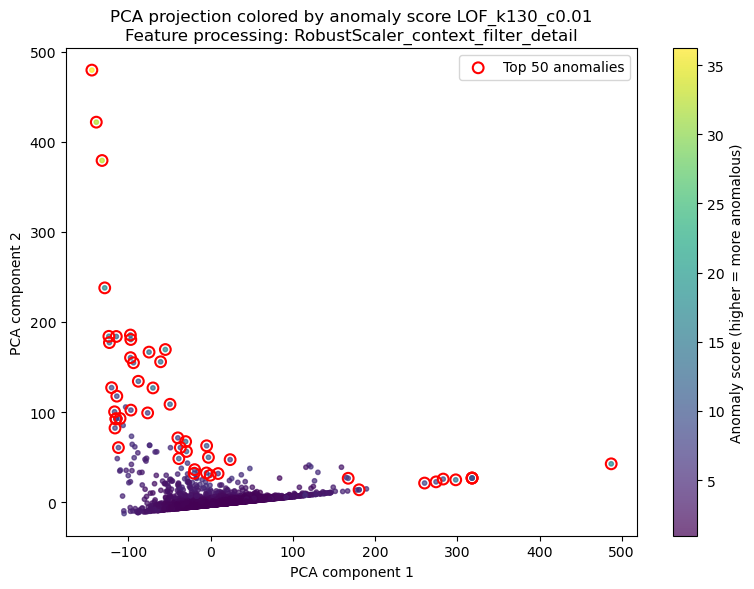

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, roc_curve
import numpy as np
import pandas as pd


X_processed, _, _ = preprocess_data(X, numeric_features, binary_features)

anomaly_scores_best = final_scores[best_detector['detector']]
# 2D PCA on weighted, scaled features
def plot_2D_PCA(X_processed, anomaly_scores, K=50, title_suffix="", feature_description=""):
    """绘制2D PCA图，突出显示前K个异常点"""
    pca = PCA(n_components=2, random_state=42)
    X_pca = pca.fit_transform(X_processed)
    
    topK_idx = np.argsort(-anomaly_scores)[:K]
    
    plt.figure(figsize=(8, 6))
    
    sc = plt.scatter(
        X_pca[:, 0],
        X_pca[:, 1],
        c=anomaly_scores,
        s=10,
        alpha=0.7
    )
    
    plt.scatter(
        X_pca[topK_idx, 0],
        X_pca[topK_idx, 1],
        facecolors='none',
        edgecolors='red',
        s=60,
        linewidths=1.5,
        label=f"Top {K} anomalies"
    )
    # plt.xlim(-2500, 2500)
    plt.colorbar(sc, label="Anomaly score (higher = more anomalous)")
    plt.xlabel("PCA component 1")
    plt.ylabel("PCA component 2")
    plt.title(f"PCA projection colored by anomaly score {title_suffix}\nFeature processing: {feature_description}")
    plt.savefig(f"pca_topK_{title_suffix.replace(' ', '_')}_{feature_description.replace(' ', '_')}.png", dpi=300)
    plt.legend()
    
    plt.tight_layout()
    plt.show()

plot_2D_PCA(X_processed, anomaly_scores_best, K=50, title_suffix=best_detector['detector'], feature_description="RobustScaler_context_filter_detail")

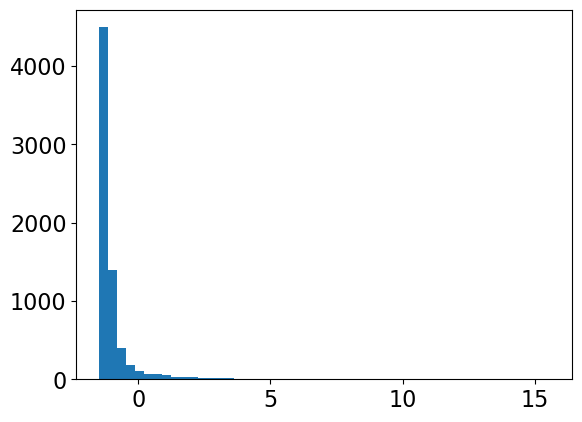

Quantile-based unique scores: [-1.4908218  -1.38641526 -1.37584756 -1.36924199 -1.36159653 -1.3555277
 -1.34984283 -1.34402854 -1.33862556 -1.33347667 -1.32821398 -1.32305703
 -1.3170865  -1.31146629 -1.30435883 -1.29869078 -1.29253883 -1.28736121
 -1.28115233 -1.27436941 -1.26797041 -1.26033824 -1.2540087  -1.24675101
 -1.23822293 -1.23000855 -1.22028302 -1.21102221 -1.19962004 -1.18824673
 -1.17699237 -1.16317894 -1.14744957 -1.13226487 -1.11229823 -1.09084375
 -1.06486488 -1.03521159 -1.00379808 -0.96701915 -0.92025069 -0.86210826
 -0.79432588 -0.70195695 -0.56483687 -0.37625056 -0.07839966  0.55584349
  1.54681533 15.55591061]
Precision@6916 (threshold -1.4908): 0.0361
Final DataFrame shape: (6916, 23)
(6916, 23)
Precision@6774 (threshold -1.3864): 0.0369
Final DataFrame shape: (6774, 23)
(6774, 23)
Precision@6633 (threshold -1.3758): 0.0377
Final DataFrame shape: (6633, 23)
(6633, 23)
Precision@6492 (threshold -1.3692): 0.0385
Final DataFrame shape: (6492, 23)
(6492, 23)
Precision

In [188]:
# 频率分布图
plt.hist(anomaly_scores_best, bins=50)
plt.show()
# unique
# unique_scores = np.unique(anomaly_scores_best)
# print("Unique anomaly scores:", np.unique(anomaly_scores_best))
# use quatiles
unique_scores = np.quantile(anomaly_scores_best, np.linspace(0, 1, 50))
print("Quantile-based unique scores:", unique_scores)
# scores = 
for score in unique_scores:
    topK_idx = np.where(anomaly_scores_best >= score)[0]

# 计算precision
    precision_at_50 = np.mean(y.iloc[topK_idx])
    print(f"Precision@{len(topK_idx)} (threshold {score:.4f}): {precision_at_50:.4f}")
    # 打印他们的值
    df_final = pd.DataFrame(X, columns=numeric_features + binary_features)
    df_final['anomaly_score'] = anomaly_scores_best
    df_final['Outlier_label'] = y.values
    df_final = df_final.iloc[topK_idx]
    print("Final DataFrame shape:", df_final.shape)
    # 恢复标签
    print(df_final.shape)

In [ ]:
anomaly_scores_best = final_scores[best_detector['detector']]

# 筛选出前50个样本
# topK_idx = np.argsort(-anomaly_scores_best)[:K]
# 筛选大于某个阈值的样本
topK_idx = np.where(anomaly_scores_best >= 1)[0]

# 计算precision
precision_at_50 = np.mean(y.iloc[topK_idx])
print(f"Precision@{len(topK_idx)}): {precision_at_50:.4f}")
# 打印他们的值
df_final = pd.DataFrame(X, columns=numeric_features + binary_features)
df_final['anomaly_score'] = anomaly_scores_best
df_final['Outlier_label'] = y.values
df_final = df_final.iloc[topK_idx]
print("Final DataFrame shape:", df_final.shape)
# 恢复标签
print(df_final.shape)
display(df_final)
# df_final.to_csv('top50_anomalies_discrete.csv', index=False)

In [96]:
df_final = pd.DataFrame(X, columns=numeric_features + binary_features)
df_final['anomaly_score'] = anomaly_scores_best
df_final['Outlier_label'] = y.values
# 挑选'TSH'>50的样本，并检查anomaly score
idx_tsh_anomalies = df_final[df_final['TSH'] > 50].index
df_tsh_anomalies = df_final.loc[idx_tsh_anomalies]
predicted = np.mean(df_final.loc[idx_tsh_anomalies, 'Outlier_label'])
print(f"Predicted anomaly rate for TSH>50 samples: {len(idx_tsh_anomalies)} {predicted:.4f}") # 51 0.7451
# 查看这些样本的anomaly score分布
print("Anomaly scores for TSH>50 samples:")
# print(df_tsh_anomalies[['TSH', 'anomaly_score', 'Outlier_label']])


Predicted anomaly rate for TSH>50 samples: 51 0.7451
Anomaly scores for TSH>50 samples:


In [95]:

# display(df_tsh_anomalies)
# 挑选TSH极低 + T3/TT4极高
idx_tsh_low_tt4_high = df_final[(df_final['query_hypothyroid'] == 1) & (df_final['TSH'] > 5) & (df_final['TSH'] < 50)].index
print("Number of samples with TSH<0.1 & T3>300:", len(idx_tsh_low_tt4_high))
df_tsh_low_tt4_high = df_final.loc[idx_tsh_low_tt4_high]
predicted_low_tt4 = np.mean(df_final.loc[idx_tsh_low_tt4_high, 'Outlier_label'])
print(f"Predicted anomaly rate for TSH<0.1 & T3>300 samples: {predicted_low_tt4:.4f}") # 48  0.5
print("Anomaly scores for TSH<0.1 & T3>300 samples:")
print(df_tsh_low_tt4_high[['TSH', 'T3_measured', 'anomaly_score', 'Outlier_label']])

Number of samples with TSH<0.1 & T3>300: 38
Predicted anomaly rate for TSH<0.1 & T3>300 samples: 0.4737
Anomaly scores for TSH<0.1 & T3>300 samples:
       TSH  T3_measured  anomaly_score  Outlier_label
17    48.0       4.0000           -0.6              1
20    14.0       0.0096           -1.0              1
21    44.0       0.0096           -0.6              1
22    48.0       5.0000           -0.6              1
59    38.0      12.0000           -0.6              1
63    22.0      15.0000           -0.6              1
88    11.0      14.0000           -0.6              1
119   11.0       0.0208            0.2              1
143   11.0      16.0000           -0.2              1
153   32.0       0.0208           -0.2              1
154   13.0       0.0300           -0.2              1
155   13.0      25.0000           -0.2              1
162   22.0       0.0200           -0.6              1
190   14.0       0.0200           -0.2              1
208   41.0      17.0000           -0.2   

In [66]:
# 对于df_final中的样本，打印他们的特征
print("Top anomalies' feature values:")
for idx in topK_idx:
    print(f"Index: {idx}, Anomaly Score: {anomaly_scores_best[idx]:.4f}, Outlier Label: {y.iloc[idx]}")
    for column in df_final.columns:
        if df_final.loc[idx, column] != 0:
            print(f"  {column}: {df_final.loc[idx, column]}")

Top anomalies' feature values:
Index: 0, Anomaly Score: 1.0000, Outlier Label: 1
  Age: 0.45
  TSH: 61.0
  T3_measured: 6.0
  TT4_measured: 23.0
  T4U_measured: 87.0
  FTI_measured: 26.0
  Sex: 1.0
  anomaly_score: 1.0
  Outlier_label: 1
Index: 3, Anomaly Score: 1.0000, Outlier Label: 1
  Age: 0.85
  TSH: 114.0
  T3_measured: 3.0
  TT4_measured: 24.0
  T4U_measured: 61.0
  FTI_measured: 39.0
  anomaly_score: 1.0
  Outlier_label: 1
Index: 5, Anomaly Score: 1.0000, Outlier Label: 1
  Age: 0.85
  TSH: 197.0
  T3_measured: 0.0096
  TT4_measured: 0.03121
  T4U_measured: 102.0
  FTI_measured: 0.03042
  query_hypothyroid: 1.0
  anomaly_score: 1.0
  Outlier_label: 1
Index: 6, Anomaly Score: 1.0000, Outlier Label: 1
  Age: 0.85
  TSH: 197.0
  T3_measured: 0.0096
  TT4_measured: 14.0
  T4U_measured: 62.0
  FTI_measured: 23.0
  anomaly_score: 1.0
  Outlier_label: 1
Index: 7, Anomaly Score: 1.0000, Outlier Label: 1
  Age: 0.49
  TSH: 96.0
  T3_measured: 4.0
  TT4_measured: 0.0029
  T4U_measured: 0

步骤8: 绘制混淆矩阵和详细评估...
混淆矩阵和评估图已保存: best_detector_LOF_k75_c0.01_confusion_matrix.png


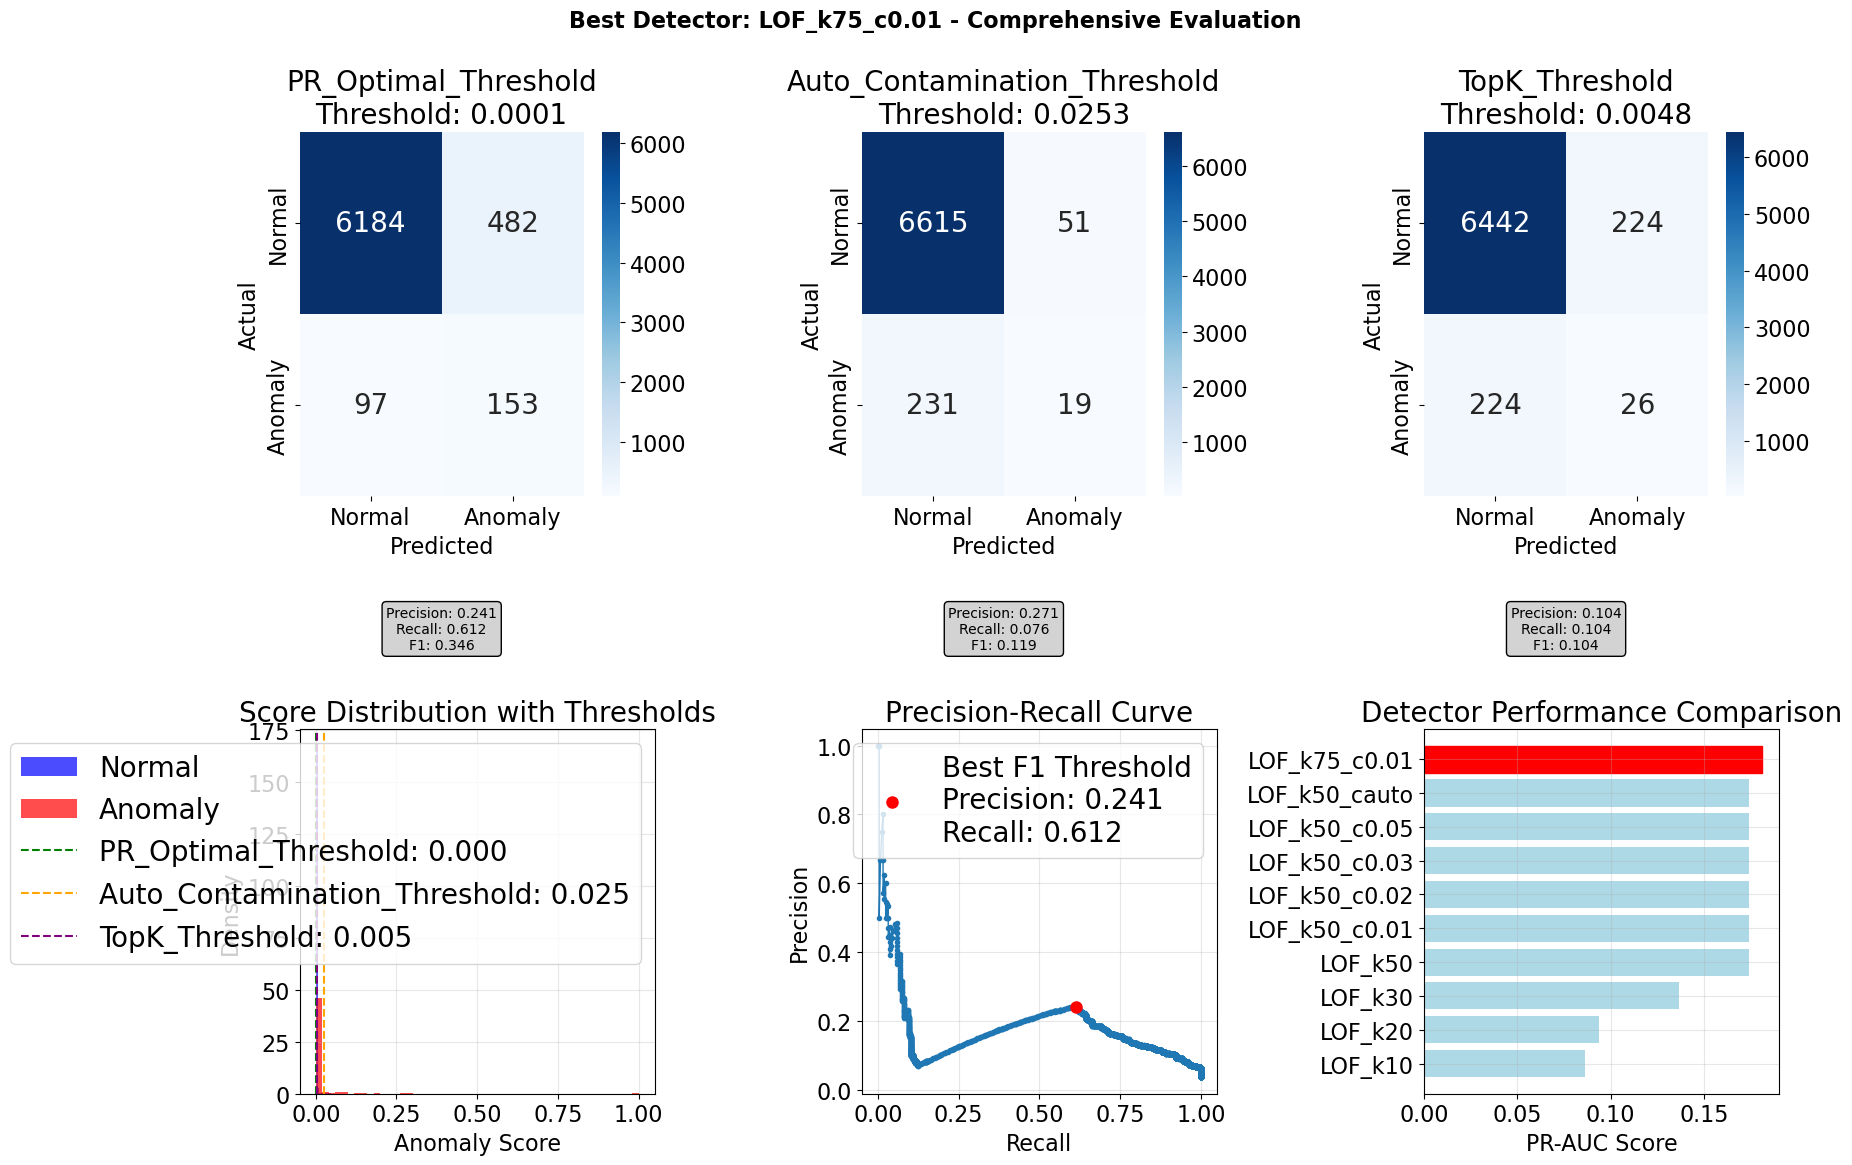

In [30]:
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ==================== 步骤8: 混淆矩阵和详细评估 ====================

def plot_confusion_matrix_and_evaluation(final_scores, y_true, best_detector_name, detectors):
    """为最佳检测器绘制混淆矩阵和详细评估"""
    
    # 获取最佳检测器的分数
    best_scores = final_scores[best_detector_name]
    
    # 方法1: 使用contamination参数确定阈值
    if 'auto' in best_detector_name:
        # 对于使用'auto' contamination的检测器，使用分位数
        contamination = 0.05  # 默认值
        threshold_auto = np.percentile(best_scores[best_scores != 0], 100 * (1 - contamination))
    else:
        # 从检测器名称中提取contamination值
        if '_c' in best_detector_name:
            contam_str = best_detector_name.split('_c')[-1]
            if contam_str != 'auto':
                contamination = float(contam_str)
                threshold_auto = np.percentile(best_scores[best_scores != 0], 100 * (1 - contamination))
            else:
                contamination = 0.05
                threshold_auto = np.percentile(best_scores[best_scores != 0], 95)
        else:
            contamination = 0.05
            threshold_auto = np.percentile(best_scores[best_scores != 0], 95)
    
    # 方法2: 使用Precision-Recall曲线确定最佳阈值
    precision, recall, thresholds_pr = precision_recall_curve(y_true, best_scores)
    f1_scores = 2 * precision * recall / (precision + recall + 1e-8)
    best_f1_idx = np.argmax(f1_scores[:-1])  # 排除最后一个元素
    threshold_pr = thresholds_pr[best_f1_idx]
    
    # 方法3: 使用top-K方法（基于真实异常数量）
    true_outlier_count = y_true.sum()
    # true_outlier_count = y_true.sum()
    if true_outlier_count > 0:
        threshold_topk = np.sort(best_scores)[-true_outlier_count]
    else:
        # 如果不知道真实异常数量，使用估计值
        estimated_outliers = 50
        threshold_topk = np.sort(best_scores)[-estimated_outliers]
    
    # 测试不同阈值
    thresholds_to_test = {
        'PR_Optimal_Threshold': threshold_pr,
        'Auto_Contamination_Threshold': threshold_auto,
        'TopK_Threshold': threshold_topk
    }
    
    # 创建可视化
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle(f'Best Detector: {best_detector_name} - Comprehensive Evaluation', fontsize=16, fontweight='bold')
    
    results_summary = {}
    
    for idx, (th_name, threshold) in enumerate(thresholds_to_test.items()):
        # 计算预测结果
        y_pred = (best_scores >= threshold).astype(int)
        
        # 计算混淆矩阵
        cm = confusion_matrix(y_true, y_pred)
        tn, fp, fn, tp = cm.ravel()
        
        # 计算评估指标
        accuracy = (tp + tn) / (tp + tn + fp + fn)
        precision_val = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall_val = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1 = 2 * precision_val * recall_val / (precision_val + recall_val) if (precision_val + recall_val) > 0 else 0
        
        # 存储结果
        results_summary[th_name] = {
            'threshold': threshold,
            'accuracy': accuracy,
            'precision': precision_val,
            'recall': recall_val,
            'f1': f1,
            'tp': tp, 'fp': fp, 'fn': fn, 'tn': tn,
            'predictions': y_pred
        }
        
        # 绘制混淆矩阵
        ax = axes[0, idx]
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                   xticklabels=['Normal', 'Anomaly'],
                   yticklabels=['Normal', 'Anomaly'])
        ax.set_title(f'{th_name}\nThreshold: {threshold:.4f}')
        ax.set_xlabel('Predicted')
        ax.set_ylabel('Actual')
        
        # 添加指标文本
        metrics_text = f'Precision: {precision_val:.3f}\nRecall: {recall_val:.3f}\nF1: {f1:.3f}'
        ax.text(0.5, -0.3, metrics_text, transform=ax.transAxes, 
               ha='center', va='top', fontsize=10,
               bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray"))
    
    # 绘制分数分布
    ax = axes[1, 0]
    normal_scores = best_scores[y_true == 0]
    outlier_scores = best_scores[y_true == 1]
    
    ax.hist(normal_scores, bins=50, alpha=0.7, label='Normal', color='blue', density=True)
    ax.hist(outlier_scores, bins=50, alpha=0.7, label='Anomaly', color='red', density=True)
    
    # 标记阈值
    colors = ['green', 'orange', 'purple']
    for i, (th_name, th_value) in enumerate(thresholds_to_test.items()):
        ax.axvline(x=th_value, color=colors[i], linestyle='--', 
                  label=f'{th_name}: {th_value:.3f}')
    
    ax.set_xlabel('Anomaly Score')
    ax.set_ylabel('Density')
    ax.set_title('Score Distribution with Thresholds')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # 绘制Precision-Recall曲线
    ax = axes[1, 1]
    precision, recall, thresholds = precision_recall_curve(y_true, best_scores)
    ax.plot(recall, precision, marker='.', linewidth=1)
    ax.set_xlabel('Recall')
    ax.set_ylabel('Precision')
    ax.set_title('Precision-Recall Curve')
    ax.grid(True, alpha=0.3)
    
    # 标记最佳阈值点
    best_precision = precision[best_f1_idx]
    best_recall = recall[best_f1_idx]
    ax.plot(best_recall, best_precision, 'ro', markersize=8, 
           label=f'Best F1 Threshold\nPrecision: {best_precision:.3f}\nRecall: {best_recall:.3f}')
    ax.legend()
    
    # 绘制检测器比较（如果有多检测器结果）
    ax = axes[1, 2]
    if len(final_scores) > 1:
        detector_names = []
        pr_auc_scores = []
        
        for det_name, scores in final_scores.items():
            if det_name != best_detector_name and np.any(scores != 0):
                precision_det, recall_det, _ = precision_recall_curve(y_true, scores)
                pr_auc_det = auc(recall_det, precision_det)
                detector_names.append(det_name)
                pr_auc_scores.append(pr_auc_det)
        
        # 添加最佳检测器
        precision_best, recall_best, _ = precision_recall_curve(y_true, best_scores)
        pr_auc_best = auc(recall_best, precision_best)
        detector_names.append(best_detector_name)
        pr_auc_scores.append(pr_auc_best)
        
        # 只显示前10个检测器避免过于拥挤
        if len(detector_names) > 10:
            detector_names = detector_names[:9] + [best_detector_name]
            pr_auc_scores = pr_auc_scores[:9] + [pr_auc_best]
        
        bars = ax.barh(detector_names, pr_auc_scores, color='lightblue')
        # 高亮最佳检测器
        best_idx = detector_names.index(best_detector_name)
        bars[best_idx].set_color('red')
        
        ax.set_xlabel('PR-AUC Score')
        ax.set_title('Detector Performance Comparison')
        ax.grid(True, alpha=0.3)
    else:
        ax.text(0.5, 0.5, 'Single Detector\nNo Comparison Available', 
               ha='center', va='center', transform=ax.transAxes, fontsize=12)
        ax.set_title('Detector Comparison')
    
    plt.tight_layout()
    
    # 保存图片
    fig_path = f"best_detector_{best_detector_name}_confusion_matrix.png"
    plt.savefig(fig_path, dpi=300, bbox_inches='tight')
    print(f"混淆矩阵和评估图已保存: {fig_path}")
    plt.show()
    
    return results_summary

print("步骤8: 绘制混淆矩阵和详细评估...")
confusion_results = plot_confusion_matrix_and_evaluation(final_scores, y, best_detector['detector'], detectors)